# HEART DISEASE PREDICTION

Import necessary packages, data processing and analysis tools

In [2]:
import seaborn as sns
import sys
import pandas as pd
import numpy as np
import sklearn
from sklearn import model_selection
from sklearn.metrics import classification_report, accuracy_score
import matplotlib
import matplotlib.pyplot as plt
import keras
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from keras import regularizers
from keras.callbacks import EarlyStopping

Loading the dataset

In [3]:
data = pd.read_csv('ECG_dataset.csv')

In [4]:
data.columns = ['age','sex','smoker','years_of_smoking','LDL_cholesterol','chest_pain_type','height','weight', 'familyhist',
                'activity', 'lifestyle', 'cardiac intervention', 'heart_rate', 'diabets', 'blood_pressure_sys', 'blood_pressure_dias', 
                 'hypertention', 'Interventricular_septal_end_diastole', 'ecg_pattern', 'Q_wave', 'target']


Review heart disease dataset samples

In [5]:
data.shape

(333, 21)

In [6]:
data.head()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,cardiac intervention,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
0,65,0,0,0,69.0,4,168,111.0,1,0,...,1,98,1,120,80,1,0,4,0,0
1,54,1,0,0,117.0,2,145,81.0,0,0,...,0,85,0,130,80,0,0,4,0,0
2,61,0,1,45,86.2,2,160,72.0,0,0,...,0,63,1,150,70,1,0,2,0,1
3,57,0,0,0,76.0,2,176,78.0,1,0,...,1,74,1,120,70,0,0,3,0,1
4,62,1,0,0,160.0,3,154,61.0,0,0,...,0,89,1,110,70,0,0,1,0,1


In [7]:
data.describe()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,cardiac intervention,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,...,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,55.117117,0.534535,0.195195,4.798799,112.926246,2.885886,162.102102,82.157357,0.237237,0.369369,...,0.255255,83.882883,0.231231,123.618619,74.879880,0.516517,0.282282,3.315315,0.078078,0.354354
std,14.159210,0.499557,0.396947,11.249835,37.972983,1.032110,11.295127,15.392197,0.426029,0.483360,...,0.436661,14.633107,0.422254,21.341639,12.681834,0.500479,0.450787,0.981596,0.268698,0.479037
min,20.000000,0.000000,0.000000,0.000000,26.000000,1.000000,128.000000,41.000000,0.000000,0.000000,...,0.000000,40.000000,0.000000,80.000000,40.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,44.000000,0.000000,0.000000,0.000000,86.200000,2.000000,153.000000,72.000000,0.000000,0.000000,...,0.000000,74.000000,0.000000,110.000000,70.000000,0.000000,0.000000,3.000000,0.000000,0.000000
50%,57.000000,1.000000,0.000000,0.000000,110.000000,3.000000,162.000000,81.000000,0.000000,0.000000,...,0.000000,84.000000,0.000000,120.000000,70.000000,1.000000,0.000000,4.000000,0.000000,0.000000
75%,67.000000,1.000000,0.000000,0.000000,137.000000,4.000000,171.000000,90.300000,0.000000,1.000000,...,1.000000,91.000000,0.000000,135.000000,80.000000,1.000000,1.000000,4.000000,0.000000,1.000000
max,90.000000,1.000000,1.000000,50.000000,260.000000,4.000000,192.000000,134.000000,1.000000,1.000000,...,1.000000,140.000000,1.000000,220.000000,140.000000,1.000000,1.000000,4.000000,1.000000,1.000000


In [8]:
data.tail()

,age,sex,smoker,years_of_smoking,LDL_cholesterol,chest_pain_type,height,weight,familyhist,activity,...,cardiac intervention,heart_rate,diabets,blood_pressure_sys,blood_pressure_dias,hypertention,Interventricular_septal_end_diastole,ecg_pattern,Q_wave,target
328,46,1,0,0,111.0,4,143,66.5,0,0,...,0,107,0,150,90,1,1,1,0,0
329,42,0,1,17,164.0,2,164,79.0,1,1,...,0,112,0,110,70,0,0,1,0,0
330,51,0,0,0,116.0,4,180,92.0,0,1,...,0,81,0,105,80,1,0,4,0,0
331,45,1,0,0,102.0,3,166,79.0,0,0,...,0,96,0,110,70,0,0,4,0,0
332,68,1,0,0,92.0,2,165,80.0,1,0,...,0,68,0,115,75,1,0,4,0,0


Exploratory Data Analysis

Checking for Missing Values

In [9]:
missing_data = data.isnull().sum()
total_percentage = (missing_data.sum()/data.shape[0]) * 100
print(f'The total percentage of missing data is {round(total_percentage,2)}%')

The total percentage of missing data is 0.0%


Review All Features

Data Distribution of All Participants

C:\Users\Sujis\AppData\Local\Temp\ipykernel_22888\3560201161.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  data.hist(ax = ax)


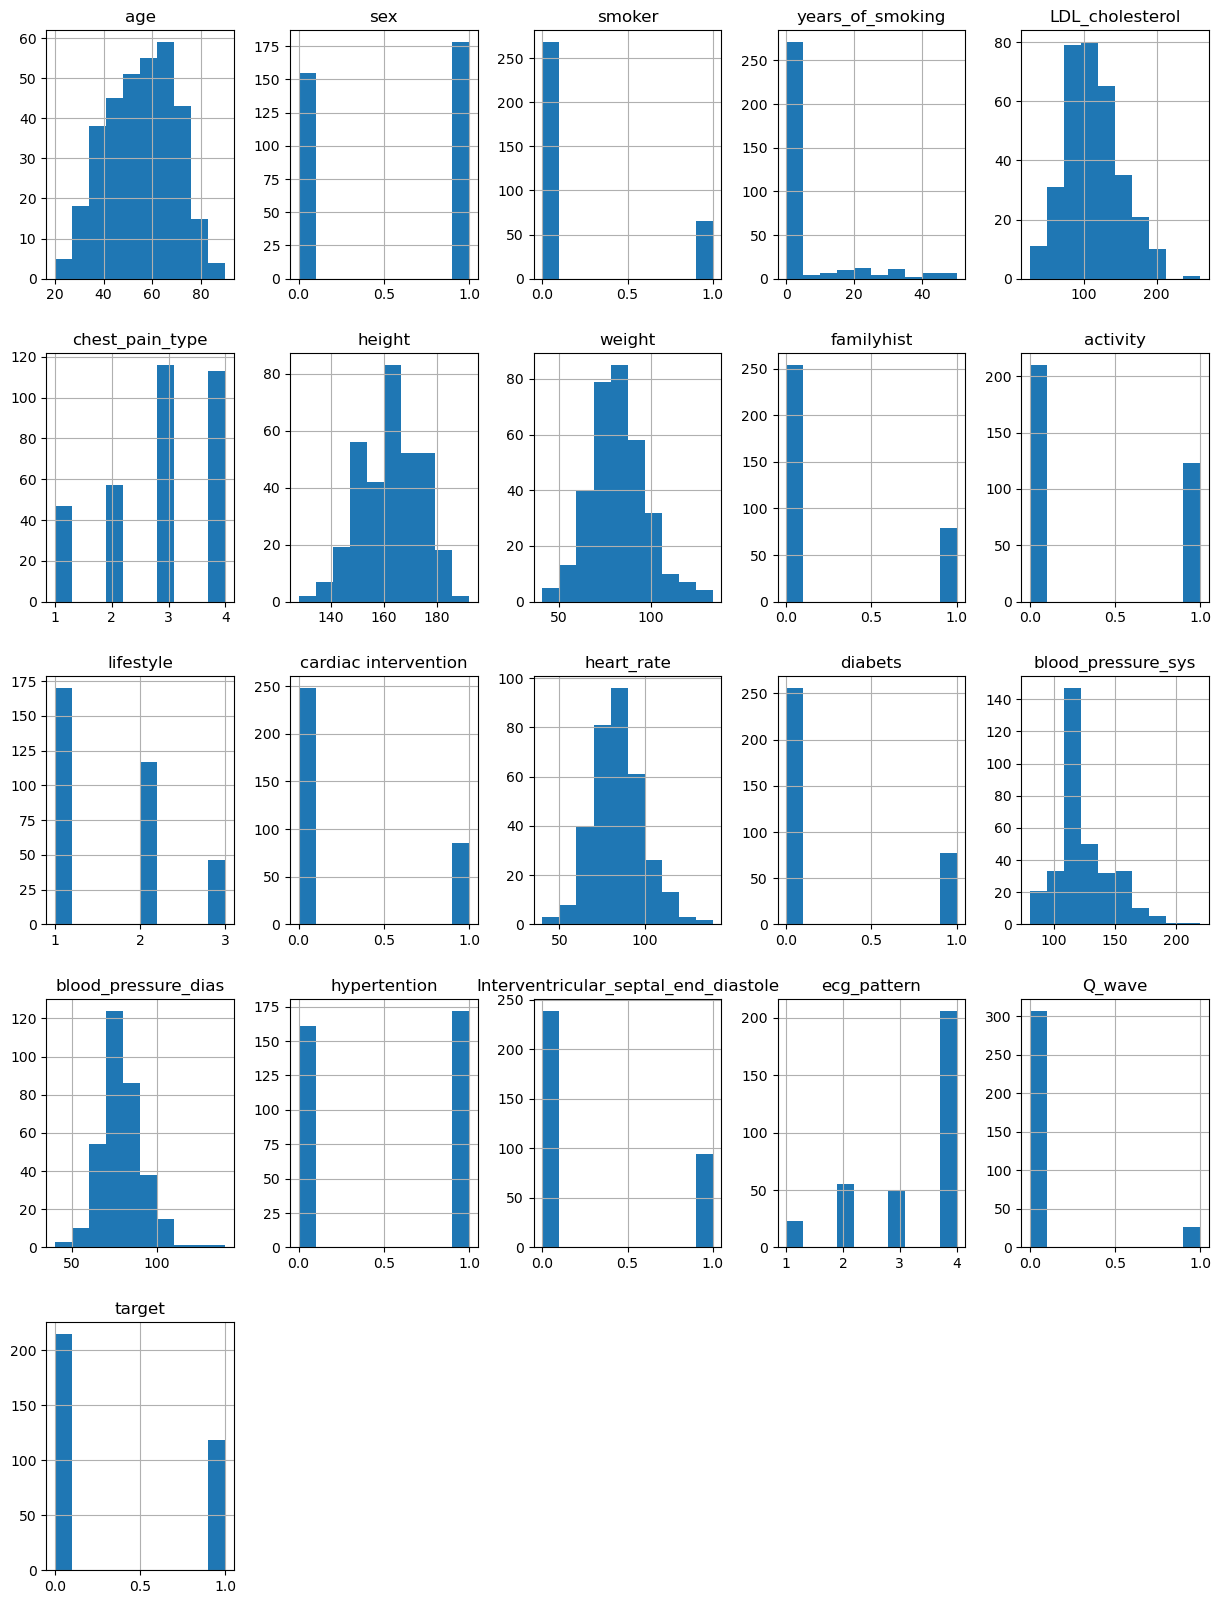

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)
plt.show()

Only Heart Disease Patients

C:\Users\Sujis\AppData\Local\Temp\ipykernel_22888\1654044097.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  dataset_copy.hist(ax = ax)


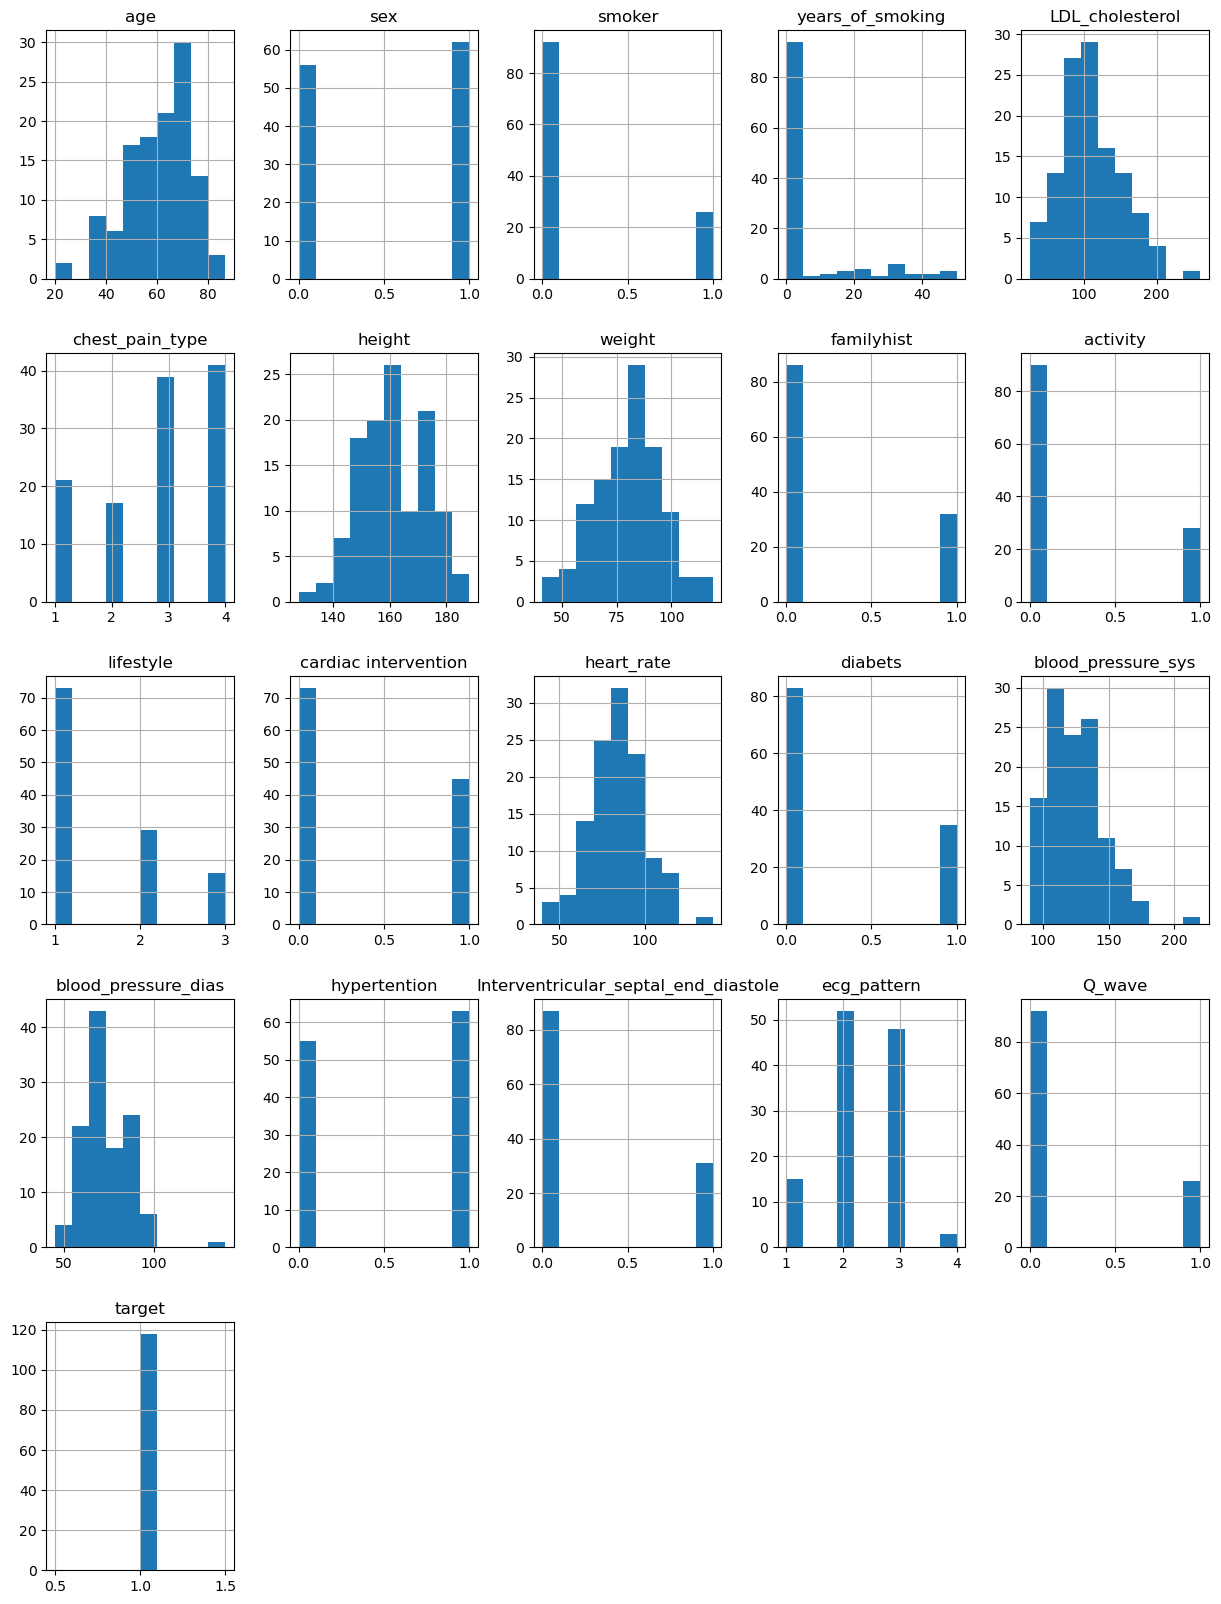

In [11]:
dataset_copy=data[data['target']==1]
columns=data.columns[:21]
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
dataset_copy.hist(ax = ax)
plt.show()

Case Counts

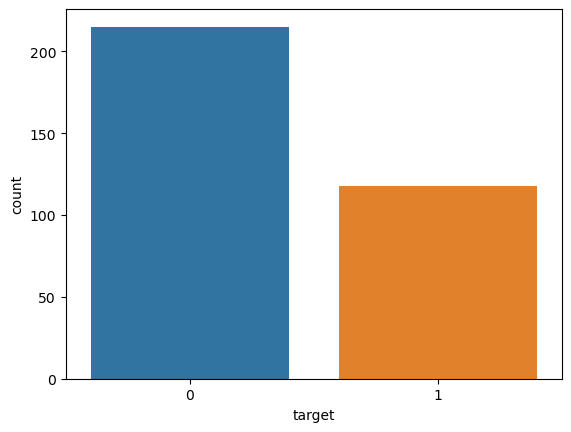

In [12]:
sns.countplot(x='target',data=data)
plt.show()

Heart Disease Frequency for Ages

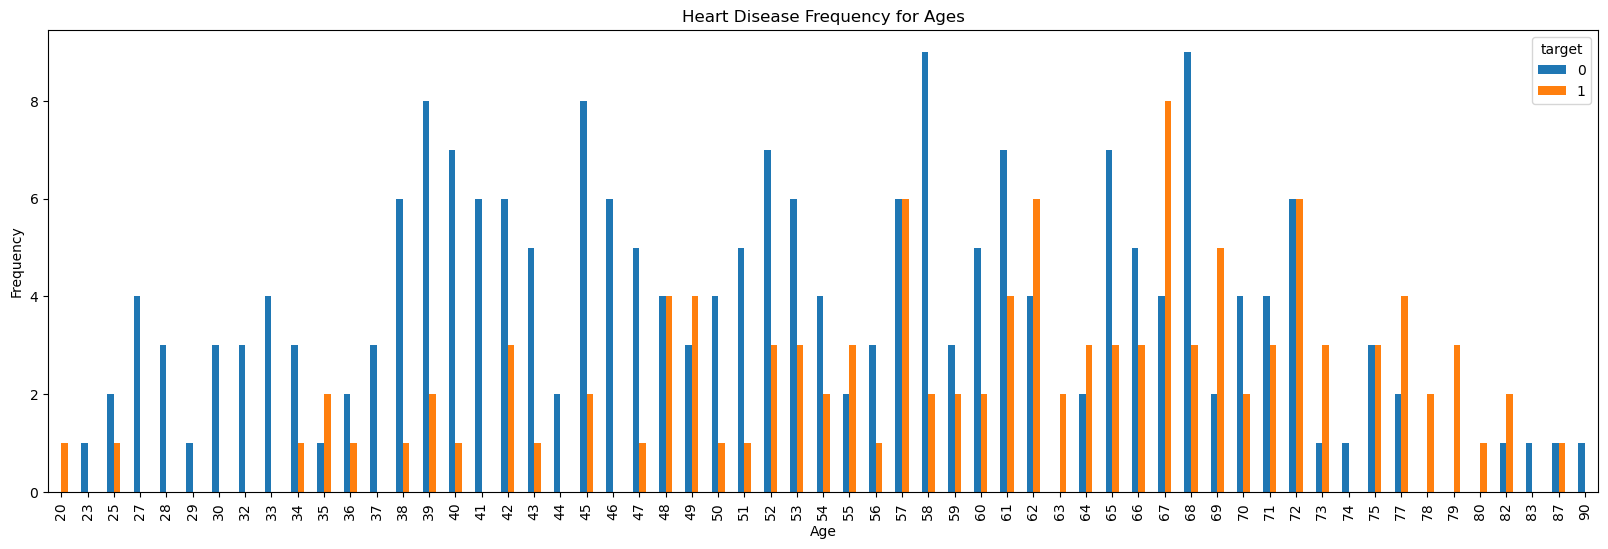

In [13]:
pd.crosstab(data.age,data.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Histogram Equalization of The Dataset

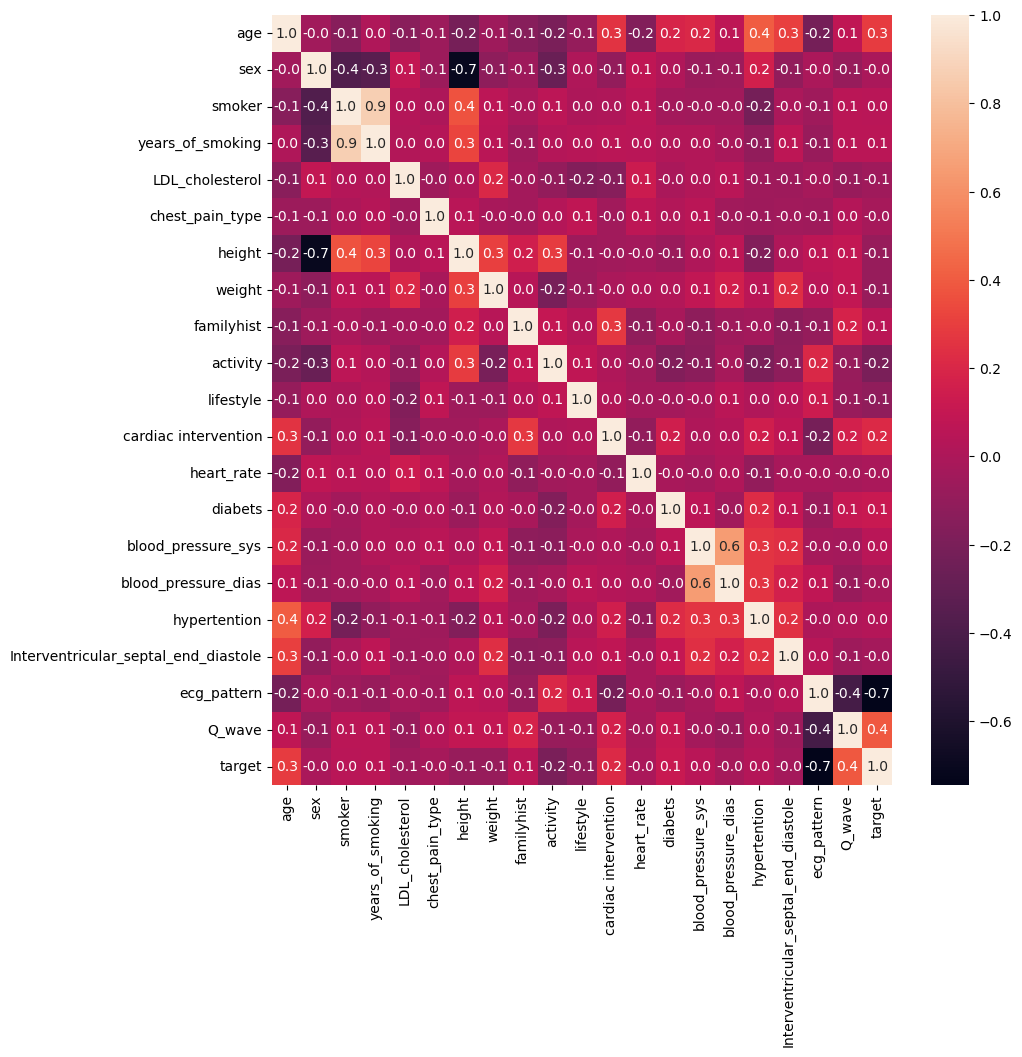

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,fmt='.1f')
plt.show()

In [15]:
data.shape

(333, 21)

Data Splitting into Training and Test Set

In [16]:
X = np.array(data.drop(['target'], 1))
y = np.array(data['target'])

C:\Users\Sujis\AppData\Local\Temp\ipykernel_22888\1844786348.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(data.drop(['target'], 1))


In [17]:
X[0]


array([ 65.,   0.,   0.,   0.,  69.,   4., 168., 111.,   1.,   0.,   1.,
         1.,  98.,   1., 120.,  80.,   1.,   0.,   4.,   0.])

Binarizing the data

In [18]:
mean = X.mean(axis=0)
X -= mean
std = X.std(axis=0)
X /= std

In [19]:
X.shape

(333, 20)

In [20]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, random_state=42, test_size = 0.2)

In [21]:
Y_train = to_categorical(y_train, num_classes=None)
Y_test = to_categorical(y_test, num_classes=None)
print (Y_train.shape)
print (Y_train[:10])

(266, 2)
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [22]:
es = EarlyStopping(monitor='loss', mode='min', verbose=1, patience=15)

Building the Model Using Neural Networks

In [24]:
model = Sequential()

# Add layers to the model
model.add(Dense(64, input_dim=20, kernel_initializer='normal', 
                 kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(32, kernel_initializer='normal', 
                 kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(8, activation='softmax'))  # Multi-class output layer
model.add(Dropout(0.20))

model.add(Dense(2, activation='sigmoid'))  # Binary output layer

# Compile the model
adam = Adam(learning_rate=0.001)  # Update to `learning_rate` for recent Keras versions
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

# Display the model's architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 64)             │         1,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 2)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,106 (16.04 KB)

 Trainable params: 4,106 (16.04 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
history=model.fit(X_test, Y_test, validation_data=(X_test, Y_test),epochs=50, batch_size=10, callbacks=[es])

acc = model.evaluate(X_test, Y_test)
print(f"Loss:      {round(acc[0]*100,2)}%\n")
print(f"Accuracy:  {round(acc[1]*100,2)}%\n")

Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.5395 - loss: 0.7198 - val_accuracy: 0.5672 - val_loss: 0.7116
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5063 - loss: 0.7204 - val_accuracy: 0.5672 - val_loss: 0.7091
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5732 - loss: 0.7131 - val_accuracy: 0.5672 - val_loss: 0.7061
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5835 - loss: 0.7039 - val_accuracy: 0.5672 - val_loss: 0.7030
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6468 - loss: 0.6820 - val_accuracy: 0.5672 - val_loss: 0.6997
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5355 - loss: 0.7094 - val_accuracy: 0.5672 - val_loss: 0.6962
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5461 - loss: 0.7038 - val_accuracy: 0.5672 - val_loss: 0.6917
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5905 - loss: 0.6916 - val_accuracy: 0.5672 - val_loss: 0.6859
Epoch 9

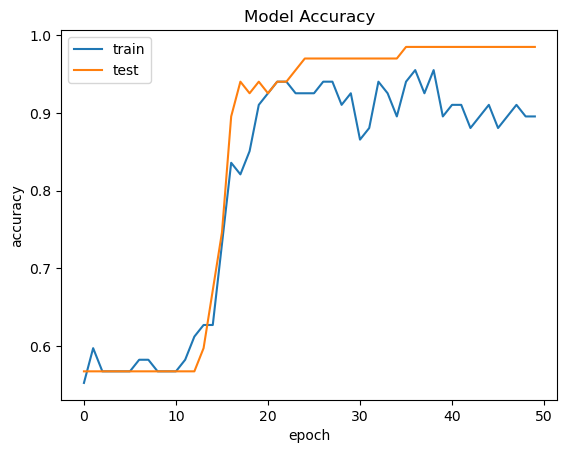

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

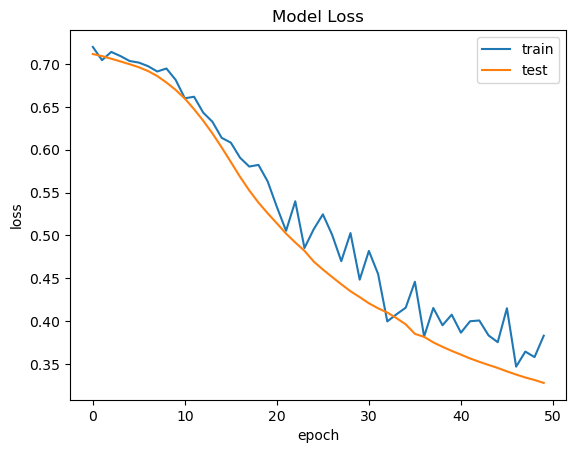

In [27]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'])
plt.show()

In [28]:

categorical_pred = np.argmax(model.predict(X_test), axis=1)

print('Results for Categorical Model')
print(accuracy_score(y_test, categorical_pred))
print(classification_report(y_test, categorical_pred))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Results for Categorical Model
0.9850746268656716
              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.97      1.00      0.98        29

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67

